#### Medical Cost Personal Insurance Project
Project Description
Health insurance is a type of insurance that covers medical expenses that arise due to an illness. These expenses could be related to hospitalisation costs, cost of medicines or doctor consultation fees. The main purpose of medical insurance is to receive the best medical care without any strain on your finances. Health insurance plans offer protection against high medical costs. It covers hospitalization expenses, day care procedures, domiciliary expenses, and ambulance charges, besides many others. Based on certain input features such as age , bmi,,no of dependents ,smoker ,region  medical insurance is calculated .
#### Columns                                            
•	age: age of primary beneficiary

•	sex: insurance contractor gender, female, male

•	bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height, objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9.

•	children: Number of children covered by health insurance / Number of dependents

•	smoker: Smoking

•	region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.

•	charges: Individual medical costs billed by health insurance

Predict : Can you accurately predict insurance costs?

##### Dataset Link-
https://github.com/FlipRoboTechnologies/ML-Datasets/blob/main/Medical%20Cost%20Insurance/medical_cost_insurance.csv


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

In [2]:
url = 'https://raw.githubusercontent.com/FlipRoboTechnologies/ML-Datasets/main/Medical%20Cost%20Insurance/medical_cost_insurance.csv'
medical_dataset = pd.read_csv(url)

In [3]:
medical_dataset

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [4]:
medical_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
medical_dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [6]:
medical_dataset.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [7]:
medical_dataset.shape

(1338, 7)

## Checking for missing value

In [8]:
medical_dataset.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

<Axes: >

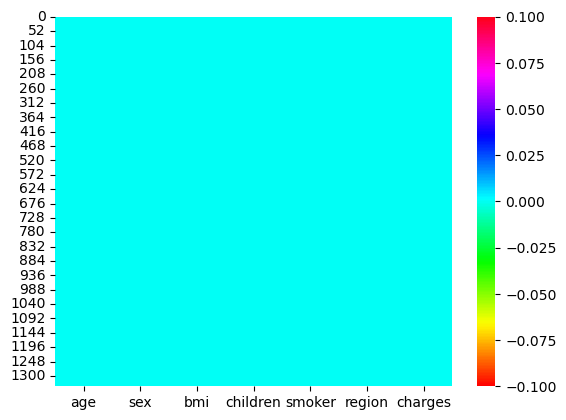

In [9]:
sns.heatmap(medical_dataset.isnull(),cmap='hsv')

In [10]:
#There is no null value present in this Dataset :)

## Describing the Data

In [11]:
medical_dataset.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [12]:
medical_dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [13]:
medical_dataset['charges'].value_counts()

1639.56310     2
16884.92400    1
29330.98315    1
2221.56445     1
19798.05455    1
              ..
7345.08400     1
26109.32905    1
28287.89766    1
1149.39590     1
29141.36030    1
Name: charges, Length: 1337, dtype: int64

In [14]:
# Only 2 entries having same charges we can refine that and can take charges as a unique column
# Here , BMI varies cause of the age and sex of patients. So , i prefere charges here !

# EDA (Exploratory Data Analysis)

<Figure size 1000x1200 with 0 Axes>

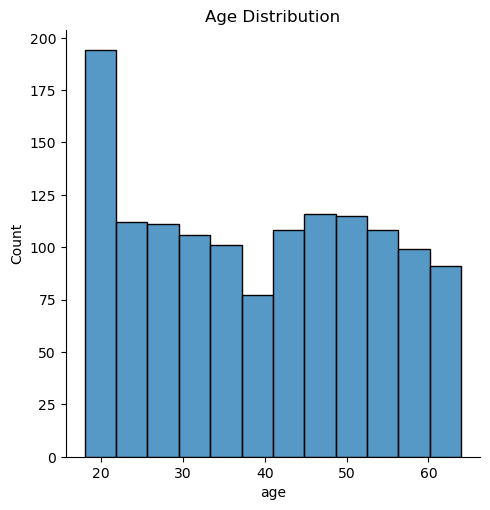

In [15]:
#Age Distribution
plt.figure(figsize=(10,12))
sns.displot(medical_dataset['age'])
plt.title("Age Distribution")
plt.show()

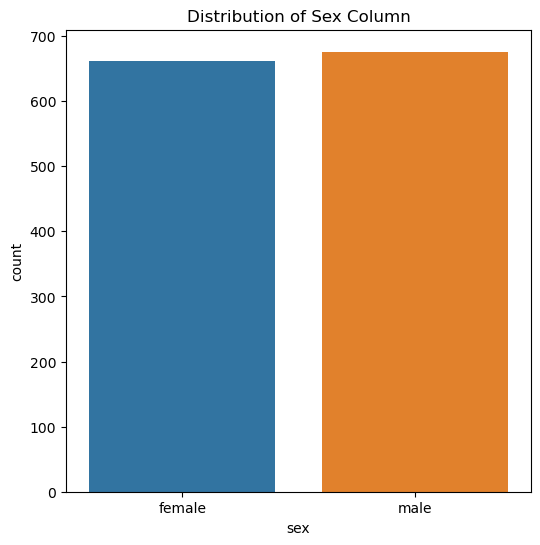

male      676
female    662
Name: sex, dtype: int64

In [16]:
#Graphical Distribution of Sex
plt.figure(figsize=(6,6))
sns.countplot(x='sex',data=medical_dataset)
plt.title("Distribution of Sex Column")
plt.show()
medical_dataset['sex'].value_counts()

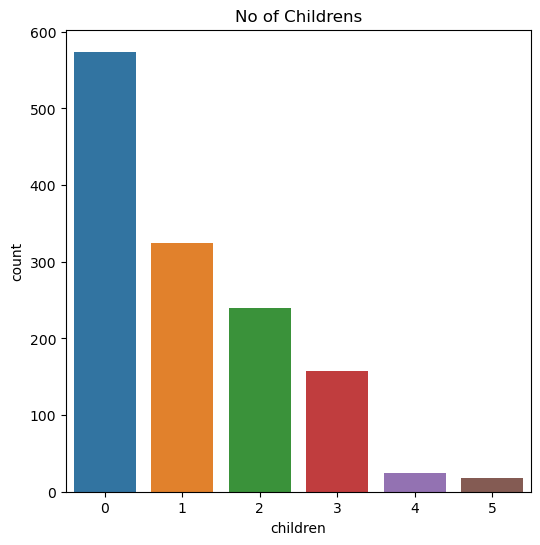

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

In [17]:
#Graphical Distribution of having children
plt.figure(figsize=(6,6))
sns.countplot(x='children',data=medical_dataset)
plt.title('No of Childrens')
plt.show()
medical_dataset['children'].value_counts()

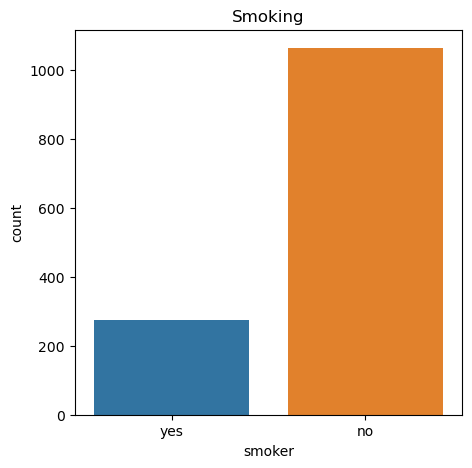

no     1064
yes     274
Name: smoker, dtype: int64

In [18]:
#Smokers Columns Visualization
plt.figure(figsize=(5,5))
sns.countplot(x='smoker',data=medical_dataset)
plt.title('Smoking')
plt.show()
medical_dataset['smoker'].value_counts()

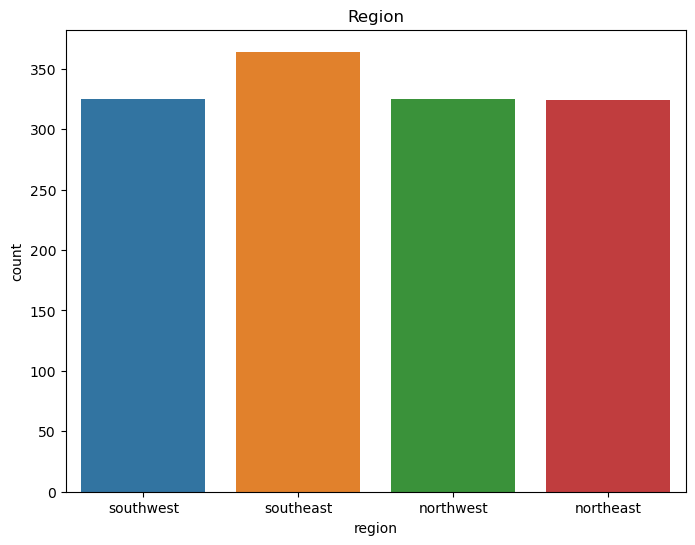

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

In [19]:
#Distribution of Region
plt.figure(figsize=(8,6))
sns.countplot(x='region',data=medical_dataset)
plt.title('Region')
plt.show()
medical_dataset['region'].value_counts()

# Skewness in Data

In [20]:
medical_dataset.skew()

age         0.055673
bmi         0.284047
children    0.938380
charges     1.515880
dtype: float64

In [21]:
medical_dataset.corr()

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


<Axes: >

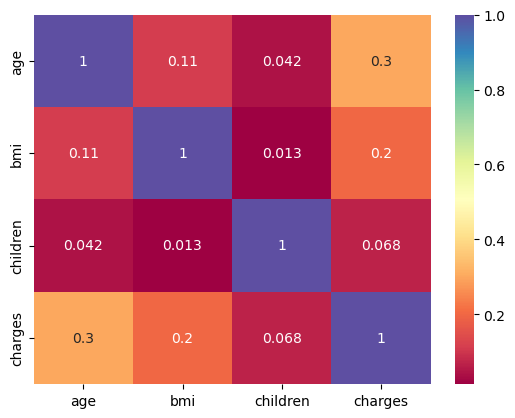

In [22]:
sns.heatmap(medical_dataset.corr(),cmap='Spectral',annot=True)

# Data Preprocessing

### Making the smoker column and region column into numerical values 
Sex:

0: Male
1: Female

Smoker:

0: Yes (Smoker)
1: No (Non-Smoker)

Region:

0: Southeast
1: Southwest
2: Northeast
3: Northwest

In [23]:
medical_dataset.replace({'sex':{'male':0,'female':1}},inplace=True)

medical_dataset.replace({'smoker':{'yes':0,'no': 1}},inplace=True)

medical_dataset.replace({'region':{'southeast':0,'southwest':1,'northeast':2,'northwest':3}},inplace=True)

In [24]:
medical_dataset

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,0,1,16884.92400
1,18,0,33.770,1,1,0,1725.55230
2,28,0,33.000,3,1,0,4449.46200
3,33,0,22.705,0,1,3,21984.47061
4,32,0,28.880,0,1,3,3866.85520
...,...,...,...,...,...,...,...
1333,50,0,30.970,3,1,3,10600.54830
1334,18,1,31.920,0,1,2,2205.98080
1335,18,1,36.850,0,1,0,1629.83350
1336,21,1,25.800,0,1,1,2007.94500


## Splitting the feature and target

In [25]:
X = medical_dataset.drop(columns='charges',axis=1)
Y  = medical_dataset['charges']

In [26]:
X

,age,sex,bmi,children,smoker,region
0,19,1,27.900,0,0,1
1,18,0,33.770,1,1,0
2,28,0,33.000,3,1,0
3,33,0,22.705,0,1,3
4,32,0,28.880,0,1,3
...,...,...,...,...,...,...
1333,50,0,30.970,3,1,3
1334,18,1,31.920,0,1,2
1335,18,1,36.850,0,1,0
1336,21,1,25.800,0,1,1


In [27]:
Y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

## Splitting the data into train test data


In [28]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [29]:
print(X.shape, X_train.shape, X_test.shape)

(1338, 6) (1070, 6) (268, 6)


# Modelling

In [30]:
#Linear Regression model
regressor = LinearRegression()

In [31]:
regressor.fit(X_train, Y_train)

LinearRegression()

In [32]:
training_data_prediction = regressor.predict(X_train)
r2_train = metrics.r2_score(Y_train,training_data_prediction)
print(r2_train)

0.751505643411174


In [33]:
# prediciting the test data
test_data_predicition = regressor.predict(X_test)
r2_test = metrics.r2_score(Y_test,test_data_predicition)

In [34]:
print(r2_test)

0.7447273869684077


# Prediction


## Sex:

### 0: Male
### 1: Female

## Smoker:

### 0: Yes (Smoker)
### 1: No (Non-Smoker)

## Region:

### 0: Southeast
### 1: Southwest
### 2: Northeast
### 3: Northwest

In [35]:
input_data = (37,1,30.8,2,1,0)

input_data_as_array = np.asarray(input_data)

input_data_reshaped = input_data_as_array.reshape(1,-1)

prediction = regressor.predict(input_data_reshaped)

print("The person will get insurance money = ",prediction[0])




The person will get insurance money =  8102.130714308576
